In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# prior antineoplastics

In [2]:
metrics_simple_query = pd.read_csv('ColBERT_priortx_BASIC_QUERY_metrics.csv')
metrics_out_of_box = pd.read_csv('ColBERT_priortx_metrics.csv')
metrics_metsitemodel = pd.read_csv('ColBERT_metsitemodel_priortx_metrics.csv')

/tmp/ipykernel_1585804/1387424401.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(metrics_out_of_box['query'],rotation=90,fontsize=20)


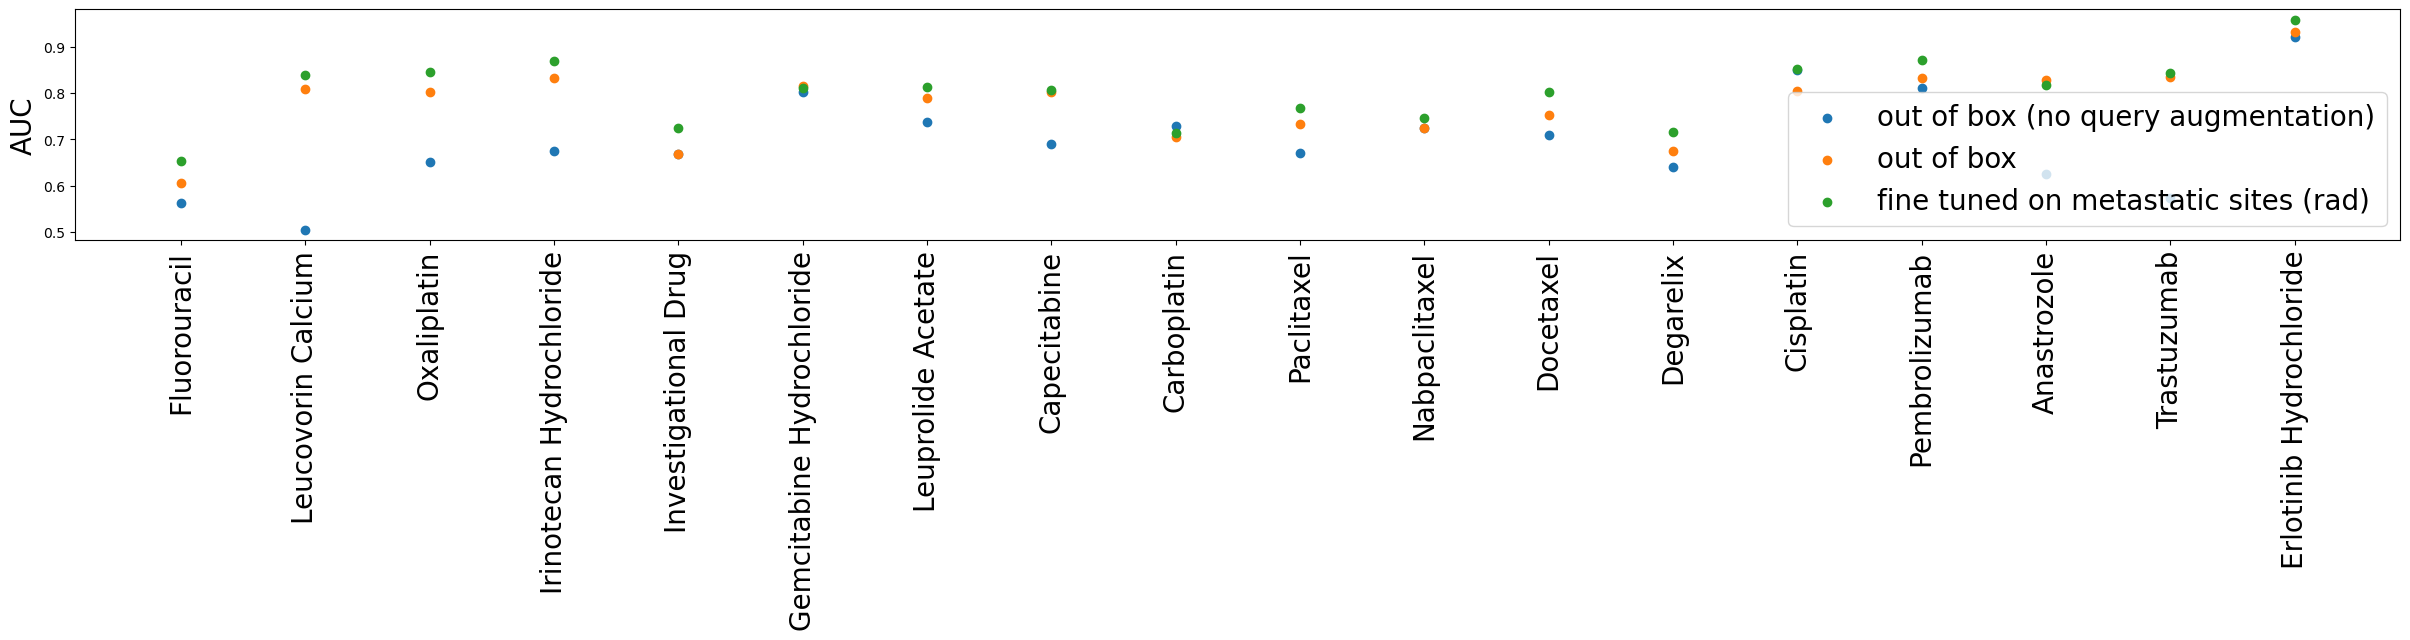

In [4]:
fig,ax=plt.subplots(figsize=(30,3))
ax.scatter(metrics_simple_query['query'],metrics_simple_query['auc'],label='out of box (no query augmentation)')
ax.scatter(metrics_out_of_box['query'],metrics_out_of_box['auc'],label='out of box')
ax.scatter(metrics_metsitemodel['query'],metrics_metsitemodel['auc'],label='fine tuned on metastatic sites (rad)')
ax.set_xticklabels(metrics_out_of_box['query'],rotation=90,fontsize=20)
ax.set_ylabel('AUC',fontsize=20)
plt.legend(fontsize=20)
plt.show()
fig.savefig('../figures/colbert_priortx.pdf',format='pdf')

In [5]:
def calculate_precision_recall_f1(df):
    """
    Calculate precision, recall, and F1-score for each row in a DataFrame.

    Parameters:
    - df: Pandas DataFrame with columns 'true_positives', 'false_positives', 'true_negatives', and 'false_negatives'.

    Returns:
    - df: The same DataFrame with additional columns 'precision', 'recall', and 'f1_score'.
    """
    # Calculate precision
    df['precision'] = df['true_positives'] / (df['true_positives'] + df['false_positives']).replace(0, np.nan)
    df['recall'] = df['true_positives'] / (df['true_positives'] + df['false_negatives']).replace(0, np.nan)
    df['f1_score'] = 2 * (df['precision'] * df['recall']) / (df['precision'] + df['recall']).replace(0, np.nan)
    df.fillna(0, inplace=True)

    return df

In [6]:
metrics_simple_query = calculate_precision_recall_f1(metrics_simple_query)
metrics_out_of_box = calculate_precision_recall_f1(metrics_out_of_box)
metrics_metsitemodel = calculate_precision_recall_f1(metrics_metsitemodel)

/tmp/ipykernel_1585804/2479739445.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(metrics_out_of_box['query'],rotation=90,fontsize=20)


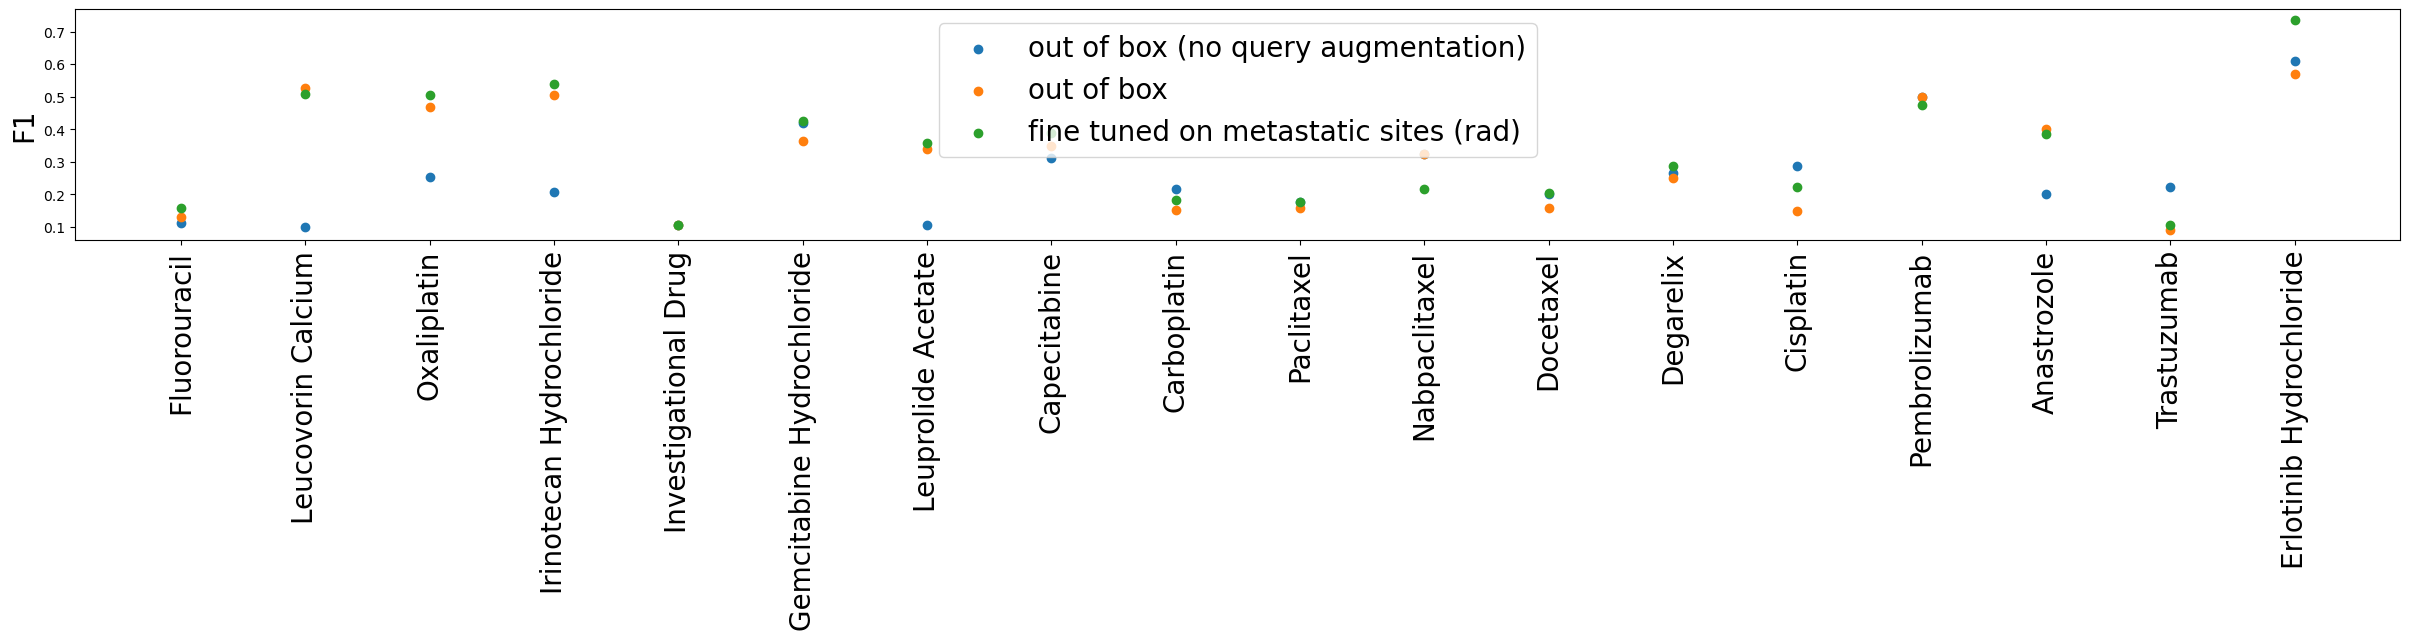

In [7]:
fig,ax=plt.subplots(figsize=(30,3))
ax.scatter(metrics_simple_query['query'],metrics_simple_query['f1_score'],label='out of box (no query augmentation)')
ax.scatter(metrics_out_of_box['query'],metrics_out_of_box['f1_score'],label='out of box')
ax.scatter(metrics_metsitemodel['query'],metrics_metsitemodel['f1_score'],label='fine tuned on metastatic sites (rad)')
ax.set_xticklabels(metrics_out_of_box['query'],rotation=90,fontsize=20)
ax.set_ylabel('F1',fontsize=20)
plt.legend(fontsize=20)
plt.show()
fig.savefig('../figures/colbert_priortx_f1.pdf',format='pdf')